<a href="https://colab.research.google.com/github/Viktory4121/MME/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1

In [1]:
data <- read.csv("energy_efficiency_data.csv", sep = ",")
#data <- na.omit(data)
head(data)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33
4,0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33
5,0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28
6,0.90,563.5,318.5,122.50,7,3,0,0,21.46,25.38


In [2]:
summary(data)

 Relative_Compactness  Surface_Area     Wall_Area       Roof_Area    
 Min.   :0.6200       Min.   :514.5   Min.   :245.0   Min.   :110.2  
 1st Qu.:0.6825       1st Qu.:606.4   1st Qu.:294.0   1st Qu.:140.9  
 Median :0.7500       Median :673.8   Median :318.5   Median :183.8  
 Mean   :0.7642       Mean   :671.7   Mean   :318.5   Mean   :176.6  
 3rd Qu.:0.8300       3rd Qu.:741.1   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9800       Max.   :808.5   Max.   :416.5   Max.   :220.5  
 Overall_Height  Orientation    Glazing_Area    Glazing_Area_Distribution
 Min.   :3.50   Min.   :2.00   Min.   :0.0000   Min.   :0.000            
 1st Qu.:3.50   1st Qu.:2.75   1st Qu.:0.1000   1st Qu.:1.750            
 Median :5.25   Median :3.50   Median :0.2500   Median :3.000            
 Mean   :5.25   Mean   :3.50   Mean   :0.2344   Mean   :2.812            
 3rd Qu.:7.00   3rd Qu.:4.25   3rd Qu.:0.4000   3rd Qu.:4.000            
 Max.   :7.00   Max.   :5.00   Max.   :0.4000   Max.   :5.000     

In [3]:
#data_111 <- read.csv(file = file.choose(), header = TRUE, sep = ",")

#2

In [4]:
#деление на тестовую и обучающую выборку
index <- sample(1:nrow(data), nrow(data) * 0.8) 
test <- data[-c(index), ]
train <- data[index, ]

#3

In [18]:
#где выходом является у1 = sum(по всем столбцам, кроме Cooling_Load)
#lm_y1 <- lm(formula = Heating_Load ~ Relative_Compactness + Surface_Area 
            #+ Wall_Area + Roof_Area + Overall_Height + Orientation + Glazing_Area + Glazing_Area_Distribution, data = train)
lm_y1 <- lm(formula = Heating_Load ~.-Cooling_Load, data = train)
summary(lm_y1)
predict_lm_y1 <- predict(lm_y1, newdata = test)
#table(lm_y1$, data$Heating_Load)


Call:
lm(formula = Heating_Load ~ . - Cooling_Load, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7769 -1.3350  0.0106  1.3179  7.6581 

Coefficients: (1 not defined because of singularities)
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                88.23663   21.89103   4.031 6.27e-05 ***
Relative_Compactness      -66.55035   11.80084  -5.639 2.62e-08 ***
Surface_Area               -0.09223    0.01970  -4.682 3.50e-06 ***
Wall_Area                   0.06505    0.00773   8.416 2.82e-16 ***
Roof_Area                        NA         NA      NA       NA    
Overall_Height              4.02280    0.38811  10.365  < 2e-16 ***
Orientation                -0.05895    0.10599  -0.556   0.5783    
Glazing_Area               19.97631    0.90816  21.996  < 2e-16 ***
Glazing_Area_Distribution   0.19942    0.07758   2.571   0.0104 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.931 on 6

ERROR: ignored

In [6]:
glm_y1 <- glm(Heating_Load ~.-Cooling_Load, data = train)
summary(glm_y1)


Call:
glm(formula = Heating_Load ~ . - Cooling_Load, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.7769  -1.3350   0.0106   1.3179   7.6581  

Coefficients: (1 not defined because of singularities)
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                88.23663   21.89103   4.031 6.27e-05 ***
Relative_Compactness      -66.55035   11.80084  -5.639 2.62e-08 ***
Surface_Area               -0.09223    0.01970  -4.682 3.50e-06 ***
Wall_Area                   0.06505    0.00773   8.416 2.82e-16 ***
Roof_Area                        NA         NA      NA       NA    
Overall_Height              4.02280    0.38811  10.365  < 2e-16 ***
Orientation                -0.05895    0.10599  -0.556   0.5783    
Glazing_Area               19.97631    0.90816  21.996  < 2e-16 ***
Glazing_Area_Distribution   0.19942    0.07758   2.571   0.0104 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion pa

In [7]:
nlm_y1 <- nlm(f = Heating_Load ~ Relative_Compactness + Surface_Area 
            + Wall_Area + Roof_Area + Overall_Height + Orientation 
            + Glazing_Area + Glazing_Area_Distribution, data = train, p = c(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
summary(nlm_y1)

ERROR: ignored

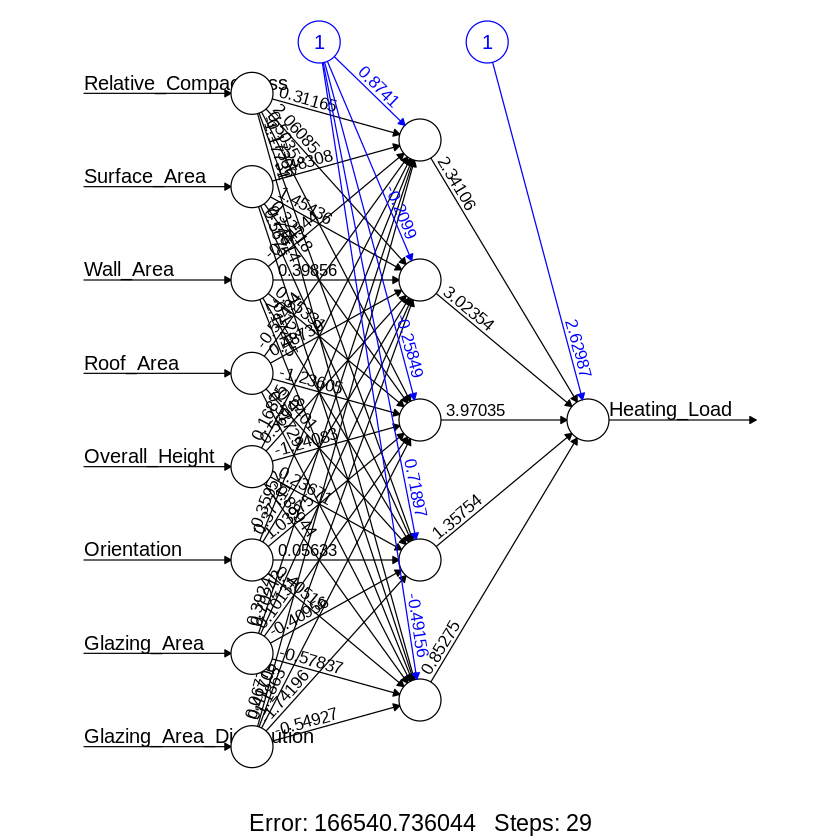

In [21]:
#install.packages("neuralnet")
library(neuralnet)
#library(ggplot2)
neuralnet_y1 <- neuralnet(Heating_Load ~.-Cooling_Load, data = train, hidden = 5, linear.output = FALSE)
plot(neuralnet_y1, rep = 1)

#-------------------------------------------------------------------------------------------------------------------------

In [9]:
#где выходом является у2 = sum(по всем столбцам, кроме Heating_Load)
lm_y2 <- lm(formula = Cooling_Load ~.-Heating_Load, data = train)
summary(lm_y2)


Call:
lm(formula = Cooling_Load ~ . - Heating_Load, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6267 -1.5751 -0.2861  1.3805 11.3018 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                99.935805  23.409032   4.269 2.28e-05 ***
Relative_Compactness      -71.459300  12.619148  -5.663 2.30e-08 ***
Surface_Area               -0.092228   0.021064  -4.378 1.41e-05 ***
Wall_Area                   0.049990   0.008266   6.047 2.58e-09 ***
Roof_Area                         NA         NA      NA       NA    
Overall_Height              4.081704   0.415023   9.835  < 2e-16 ***
Orientation                 0.110862   0.113344   0.978    0.328    
Glazing_Area               14.501237   0.971135  14.932  < 2e-16 ***
Glazing_Area_Distribution   0.018180   0.082955   0.219    0.827    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 

In [10]:
glm_y2 <- glm(Cooling_Load ~.-Heating_Load, data = train)
summary(glm_y2)


Call:
glm(formula = Cooling_Load ~ . - Heating_Load, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.6267  -1.5751  -0.2861   1.3805  11.3018  

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                99.935805  23.409032   4.269 2.28e-05 ***
Relative_Compactness      -71.459300  12.619148  -5.663 2.30e-08 ***
Surface_Area               -0.092228   0.021064  -4.378 1.41e-05 ***
Wall_Area                   0.049990   0.008266   6.047 2.58e-09 ***
Roof_Area                         NA         NA      NA       NA    
Overall_Height              4.081704   0.415023   9.835  < 2e-16 ***
Orientation                 0.110862   0.113344   0.978    0.328    
Glazing_Area               14.501237   0.971135  14.932  < 2e-16 ***
Glazing_Area_Distribution   0.018180   0.082955   0.219    0.827    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dis

In [ ]:
nlm_y2 <- nlm(f = Cooling_Load ~ Relative_Compactness + Surface_Area 
            + Wall_Area + Roof_Area + Overall_Height + Orientation 
            + Glazing_Area + Glazing_Area_Distribution, data = train, p = c(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
summary(nlm_y2)

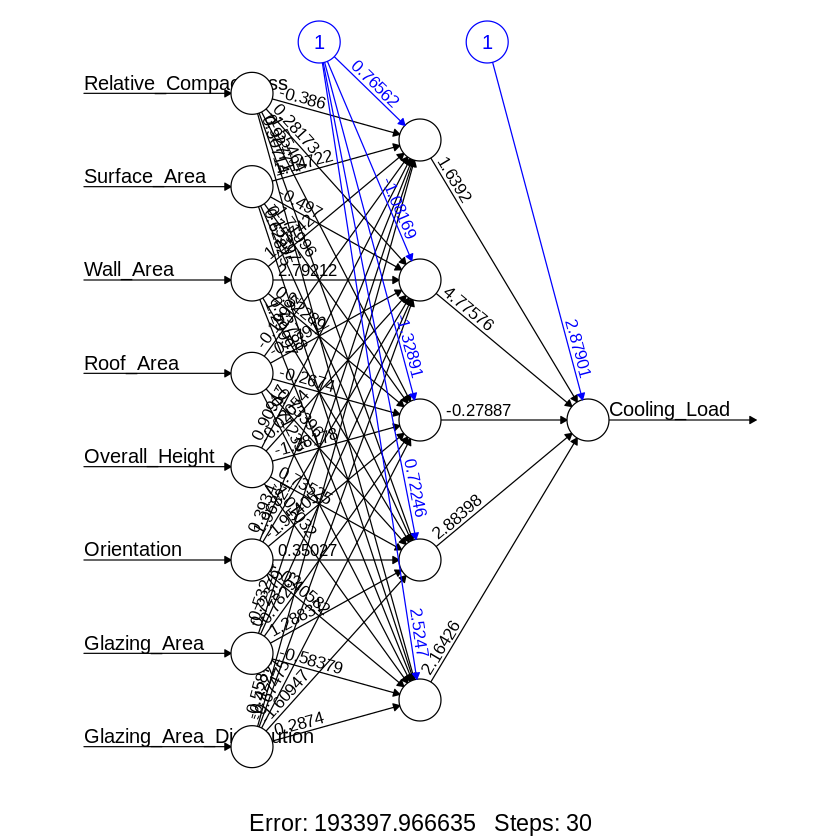

In [20]:
neuralnet_y2 <- neuralnet(Cooling_Load ~.-Heating_Load, data = train, hidden = 5, linear.output = FALSE)
plot(neuralnet_y2, rep = 1)